# Результаты работы моделей

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, accuracy_score, log_loss, roc_curve

from keras.models import load_model

from lightgbm import plot_importance

## Построение ROC-кривых для всех полученных моделей

In [2]:
# Подгружаем данные

df_train = pd.read_csv('data/train_data_with_scores')
df_valid = pd.read_csv('data/valid_data_with_scores')
df_test = pd.read_csv('data/test_data_with_scores')

df_train = df_train.drop(columns='Unnamed: 0', axis=1)
df_valid = df_valid.drop(columns='Unnamed: 0', axis=1)
df_test = df_test.drop(columns='Unnamed: 0', axis=1)

### ROC AUC неоткалиброванных моделей ML

In [3]:
feature_columns = [
    'Client_age', 'Gender', 'Numb_of_Prod', 'Salary',
    'HasCrCard', 'Numb_of_years', 'CreditScore', 'Balance', 'IsActiveMember',
]
target_col = 'res'

In [4]:
score_names = ['model_xgb_score', 'model_lgb_score', 'model_rf_score', 'model_log_score']
model_names = ['model_xgb', 'model_lgb', 'model_rf', 'model_log']

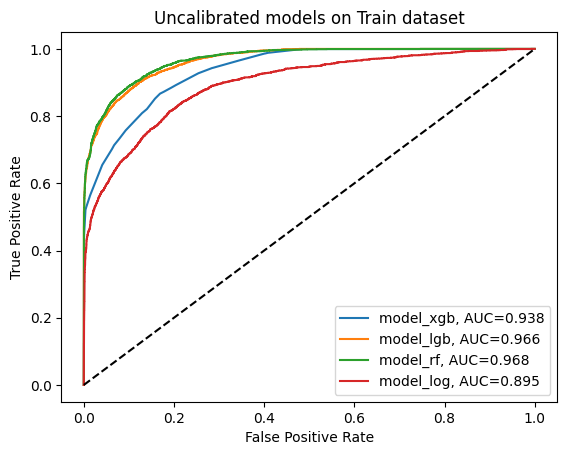

In [5]:
# Train

fig = plt.figure()
for i, name in enumerate(score_names):
    fpr, tpr, thresholds = roc_curve(df_train[target_col], df_train[name], pos_label=1)
    score = roc_auc_score(df_train[target_col], df_train[name])
    plt.plot(fpr, tpr, label=f'{model_names[i]}, AUC={round(score, 3)}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('Uncalibrated models on Train dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
fig.savefig('roc_auc_uncalib_Train_ml.pdf')

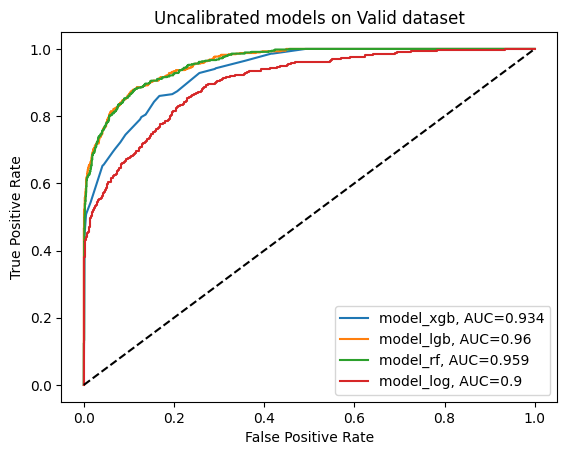

In [6]:
# Valid

fig = plt.figure()
for i, name in enumerate(score_names):
    fpr, tpr, thresholds = roc_curve(df_valid[target_col], df_valid[name], pos_label=1)
    score = roc_auc_score(df_valid[target_col], df_valid[name])
    plt.plot(fpr, tpr, label=f'{model_names[i]}, AUC={round(score, 3)}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('Uncalibrated models on Valid dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
fig.savefig('roc_auc_uncalib_Valid_ml.pdf')

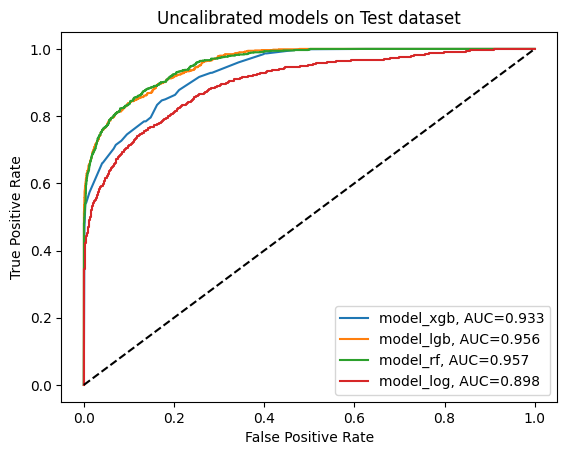

In [7]:
# Test

fig = plt.figure()
for i, name in enumerate(score_names):
    fpr, tpr, thresholds = roc_curve(df_test[target_col], df_test[name], pos_label=1)
    score = roc_auc_score(df_test[target_col], df_test[name])
    plt.plot(fpr, tpr, label=f'{model_names[i]}, AUC={round(score, 3)}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('Uncalibrated models on Test dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
fig.savefig('roc_auc_uncalib_Test_ml.pdf')

### ROC AUC неоткалиброванных нейронных сетей

In [8]:
score_names = [
    'model_nn_0_score','model_nn_1_score', 'model_nn_2_score', 'model_nn_3_score',
    'model_nn_4_score', 'model_nn_5_score', 'model_nn_6_score',
]
model_names = [
    'model_nn_0','model_nn_1', 'model_nn_2', 'model_nn_3',
    'model_nn_4', 'model_nn_5', 'model_nn_6',
]

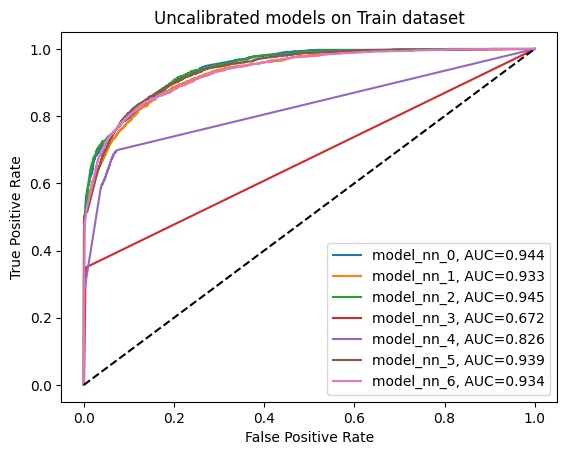

In [9]:
# Train

fig = plt.figure()
for i, name in enumerate(score_names):
    fpr, tpr, thresholds = roc_curve(df_train[target_col], df_train[name], pos_label=1)
    score = roc_auc_score(df_train[target_col], df_train[name])
    plt.plot(fpr, tpr, label=f'{model_names[i]}, AUC={round(score, 3)}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('Uncalibrated models on Train dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
fig.savefig('roc_auc_uncalib_Train_nn.pdf')

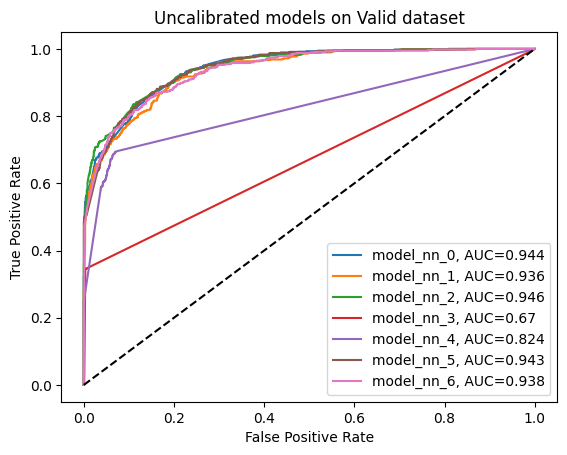

In [10]:
# Valid

fig = plt.figure()
for i, name in enumerate(score_names):
    fpr, tpr, thresholds = roc_curve(df_valid[target_col], df_valid[name], pos_label=1)
    score = roc_auc_score(df_valid[target_col], df_valid[name])
    plt.plot(fpr, tpr, label=f'{model_names[i]}, AUC={round(score, 3)}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('Uncalibrated models on Valid dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
fig.savefig('roc_auc_uncalib_Valid_nn.pdf')

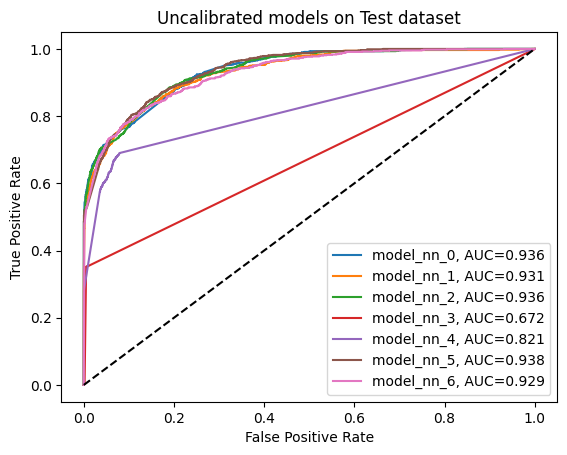

In [11]:
# Test

fig = plt.figure()
for i, name in enumerate(score_names):
    fpr, tpr, thresholds = roc_curve(df_test[target_col], df_test[name], pos_label=1)
    score = roc_auc_score(df_test[target_col], df_test[name])
    plt.plot(fpr, tpr, label=f'{model_names[i]}, AUC={round(score, 3)}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('Uncalibrated models on Test dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
fig.savefig('roc_auc_uncalib_Test_nn.pdf')

### ROC AUC откалиброванных классических моделей ML

In [12]:
score_names = ['model_xgb_score_calib', 'model_lgb_score_calib', 'model_rf_score_calib', 'model_log_score_calib']
model_names = ['model_xgb', 'model_lgb', 'model_rf', 'model_log']

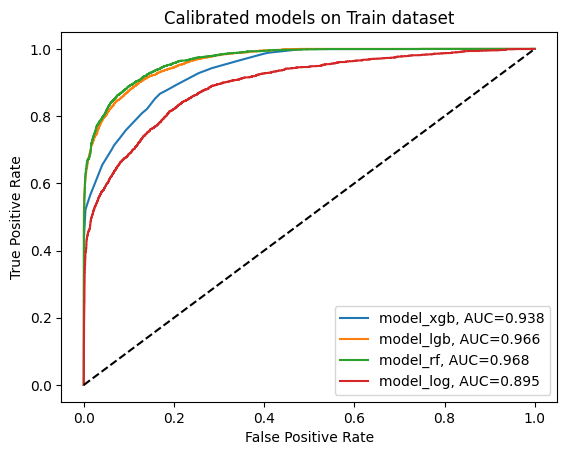

In [13]:
# Train

fig = plt.figure()
for i, name in enumerate(score_names):
    fpr, tpr, thresholds = roc_curve(df_train[target_col], df_train[name], pos_label=1)
    score = roc_auc_score(df_train[target_col], df_train[name])
    plt.plot(fpr, tpr, label=f'{model_names[i]}, AUC={round(score, 3)}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('Calibrated models on Train dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
fig.savefig('roc_auc_calib_Train_ml.pdf')

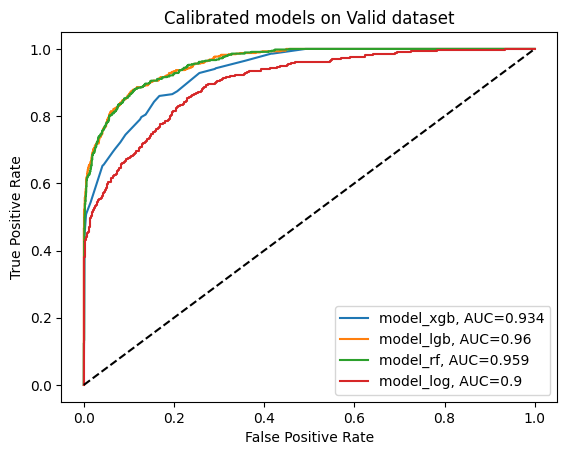

In [14]:
# Valid

fig = plt.figure()
for i, name in enumerate(score_names):
    fpr, tpr, thresholds = roc_curve(df_valid[target_col], df_valid[name], pos_label=1)
    score = roc_auc_score(df_valid[target_col], df_valid[name])
    plt.plot(fpr, tpr, label=f'{model_names[i]}, AUC={round(score, 3)}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('Calibrated models on Valid dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
fig.savefig('roc_auc_calib_Valid_ml.pdf')

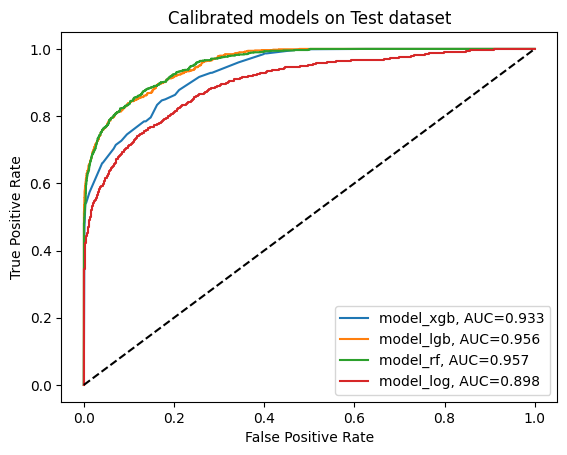

In [15]:
# Test

fig = plt.figure()
for i, name in enumerate(score_names):
    fpr, tpr, thresholds = roc_curve(df_test[target_col], df_test[name], pos_label=1)
    score = roc_auc_score(df_test[target_col], df_test[name])
    plt.plot(fpr, tpr, label=f'{model_names[i]}, AUC={round(score, 3)}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('Calibrated models on Test dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
fig.savefig('roc_auc_calib_Test_ml.pdf')

### ROC AUC откалиброванных нейронных сетей

In [16]:
score_names = [
    'model_nn_0_score_calib','model_nn_1_score_calib', 'model_nn_2_score_calib', 'model_nn_3_score_calib',
    'model_nn_4_score_calib', 'model_nn_5_score_calib', 'model_nn_6_score_calib',
]
model_names = [
    'model_nn_0','model_nn_1', 'model_nn_2', 'model_nn_3',
    'model_nn_4', 'model_nn_5', 'model_nn_6',
]

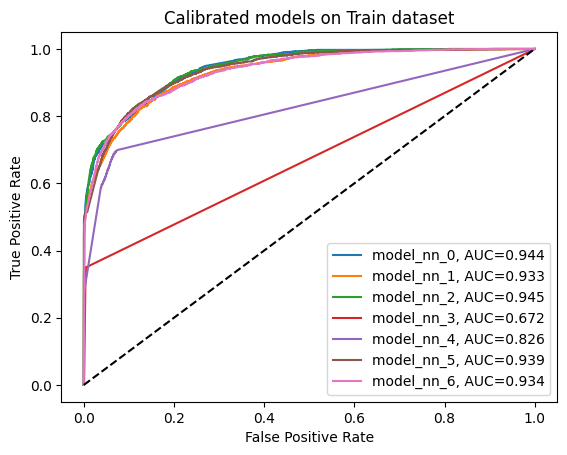

In [17]:
# Train

fig = plt.figure()
for i, name in enumerate(score_names):
    fpr, tpr, thresholds = roc_curve(df_train[target_col], df_train[name], pos_label=1)
    score = roc_auc_score(df_train[target_col], df_train[name])
    plt.plot(fpr, tpr, label=f'{model_names[i]}, AUC={round(score, 3)}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('Calibrated models on Train dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
fig.savefig('roc_auc_calib_Train_nn.pdf')

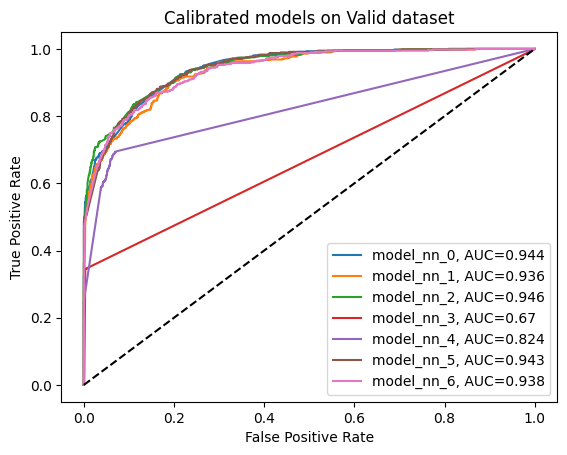

In [18]:
# Valid

fig = plt.figure()
for i, name in enumerate(score_names):
    fpr, tpr, thresholds = roc_curve(df_valid[target_col], df_valid[name], pos_label=1)
    score = roc_auc_score(df_valid[target_col], df_valid[name])
    plt.plot(fpr, tpr, label=f'{model_names[i]}, AUC={round(score, 3)}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('Calibrated models on Valid dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
fig.savefig('roc_auc_calib_Valid_nn.pdf')

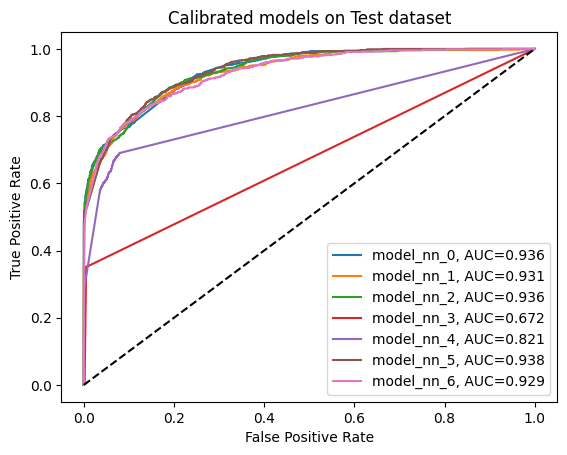

In [19]:
# Test

fig = plt.figure()
for i, name in enumerate(score_names):
    fpr, tpr, thresholds = roc_curve(df_test[target_col], df_test[name], pos_label=1)
    score = roc_auc_score(df_test[target_col], df_test[name])
    plt.plot(fpr, tpr, label=f'{model_names[i]}, AUC={round(score, 3)}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('Calibrated models on Test dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
fig.savefig('roc_auc_calib_Test_nn.pdf')

### ROC AUC откалиброванных классических моделей ML  (K-fold)

In [20]:
score_names = ['model_xgb_score_calib_kfold', 'model_lgb_score_calib_kfold', 'model_rf_score_calib_kfold', 'model_log_score_calib_kfold']
model_names = ['model_xgb', 'model_lgb', 'model_rf', 'model_log']

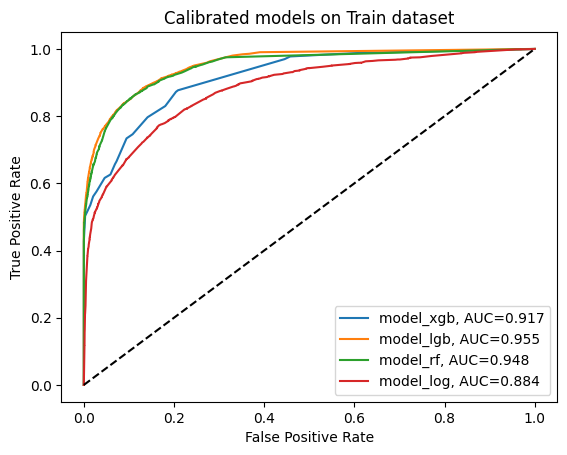

In [21]:
# Train

fig = plt.figure()
for i, name in enumerate(score_names):
    fpr, tpr, thresholds = roc_curve(df_train[target_col], df_train[name], pos_label=1)
    score = roc_auc_score(df_train[target_col], df_train[name])
    plt.plot(fpr, tpr, label=f'{model_names[i]}, AUC={round(score, 3)}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('Calibrated models on Train dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
fig.savefig('roc_auc_calib_Train_nn.pdf')

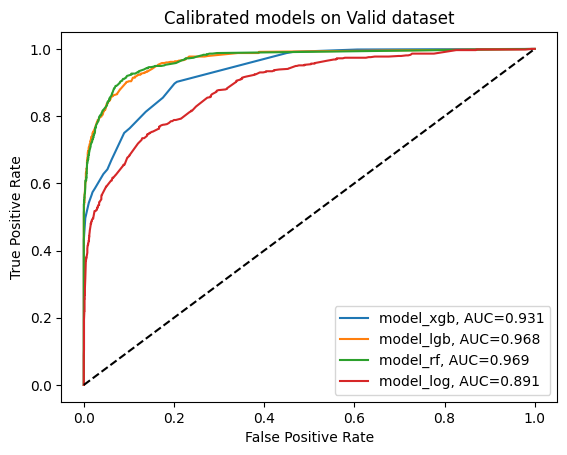

In [22]:
# Valid

fig = plt.figure()
for i, name in enumerate(score_names):
    fpr, tpr, thresholds = roc_curve(df_valid[target_col], df_valid[name], pos_label=1)
    score = roc_auc_score(df_valid[target_col], df_valid[name])
    plt.plot(fpr, tpr, label=f'{model_names[i]}, AUC={round(score, 3)}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('Calibrated models on Valid dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
fig.savefig('roc_auc_calib_Valid_nn.pdf')

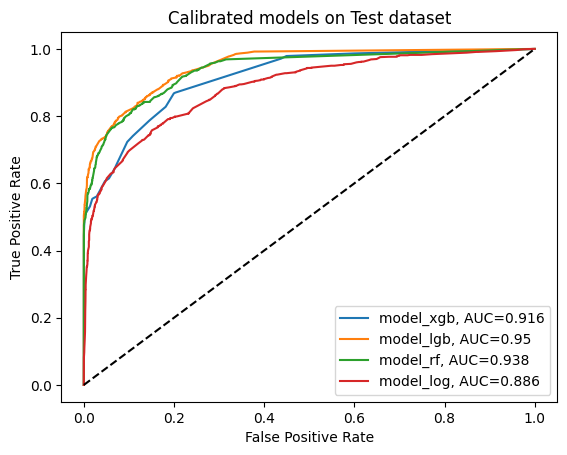

In [23]:
# Test

fig = plt.figure()
for i, name in enumerate(score_names):
    fpr, tpr, thresholds = roc_curve(df_test[target_col], df_test[name], pos_label=1)
    score = roc_auc_score(df_test[target_col], df_test[name])
    plt.plot(fpr, tpr, label=f'{model_names[i]}, AUC={round(score, 3)}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('Calibrated models on Test dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
fig.savefig('roc_auc_calib_Test_nn.pdf')

## Построение графика значимости характеристик (метод Light GBM)

На данном графике отражено влияние характиристик на предсказания модели

In [24]:
# Подгружаем модель LightGBM

with open('models/model_lgb.pkl', 'rb') as f:
    model_lgb = pickle.load(f)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

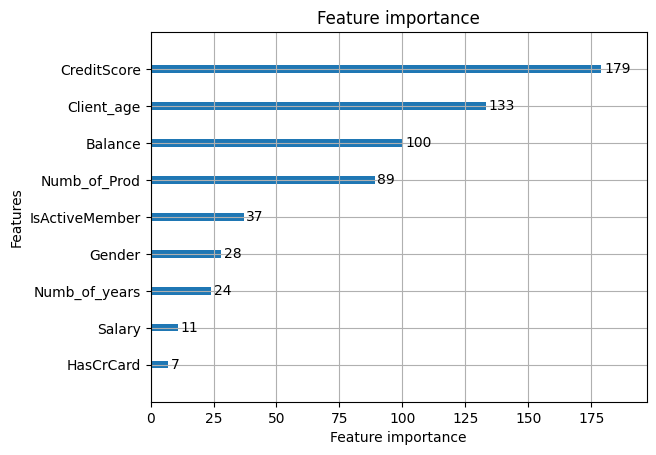

In [25]:
plot_importance(model_lgb)

## Итоговая таблица полученных метрик

In [26]:
df_metrics = pd.read_csv('data/metrics_all_calib.csv')
df_metrics = df_metrics.set_index('Unnamed: 0')
df_metrics

,Train_loss,Valid_loss,Test_loss,Train_accuracy,Valid_accuracy,Test_accuracy,Train_AUC,Valid_AUC,Test_AUC
Unnamed: 0,,,,,,,,,
model_0,0.209,0.919,0.973,0.213,0.914,0.972,0.210,0.922,0.973
model_1,0.231,0.909,0.968,0.239,0.905,0.967,0.225,0.913,0.969
model_2,0.216,0.921,0.971,0.214,0.923,0.972,0.226,0.919,0.969
model_3,0.399,0.876,0.881,0.408,0.873,0.879,0.391,0.880,0.883
model_4,0.297,0.894,0.932,0.304,0.890,0.929,0.297,0.895,0.931
model_5,0.220,0.908,0.972,0.218,0.906,0.972,0.216,0.908,0.972
model_6,0.235,0.904,0.967,0.234,0.900,0.968,0.238,0.907,0.966
model_xgb,0.433,0.441,0.428,0.817,0.811,0.821,0.938,0.934,0.933
model_lgb,0.165,0.180,0.176,0.932,0.924,0.928,0.966,0.960,0.956
